In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('students.csv')
df

,StudentID,Name,Age,Gender,Major,GPA,AttendanceRate,StudyHoursPerWeek,Extracurricular,ScholarshipType,FamilyIncomeK,EnrollmentYear,Semester,TotalCoursesAttempted,PassedCourses,FailedCourses,DropoutRiskScore,Dropout
0,1075722,Lisa Frazier,23,Female,Psychology,3.15,66.6,3.5,Coding Club,Merit,40,2017,8,27,26,1,0.090,0
1,1080185,Gina Bishop,23,Male,Biology,3.25,91.7,8.0,NaN,NaN,35,2024,9,31,30,1,0.129,0
2,1019865,Joseph Davis DVM,26,Male,Computer Science,2.58,72.1,10.3,NaN,NaN,44,2016,3,16,14,2,0.260,1
3,1076700,Jason Franklin,23,Male,English,3.63,100.0,6.3,NaN,NaN,12,2016,6,22,22,0,0.191,0
4,1092992,Lee Davidson,27,Male,Mechanical Engineering,2.65,82.8,6.9,Sports,NaN,38,2018,12,24,20,4,0.235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1006266,Adrienne Sanchez,26,Male,Electrical Engineering,2.31,75.7,16.0,Arts,Merit,34,2022,6,21,19,2,0.115,0
99996,1054887,Alisha Becker,27,Male,Mechanical Engineering,2.09,73.5,16.0,Volunteering,Merit,20,2025,2,17,14,3,0.180,0
99997,1076821,Debra Meyer DVM,29,Male,Business,2.33,93.3,7.5,Arts,NaN,26,2023,7,16,15,1,0.230,0
99998,1000861,John Cox,20,Female,Electrical Engineering,2.92,83.3,15.0,Sports,NaN,38,2022,7,21,20,1,0.245,0


In [3]:
df.drop(["StudentID"],axis=1,inplace=True)
df

,Name,Age,Gender,Major,GPA,AttendanceRate,StudyHoursPerWeek,Extracurricular,ScholarshipType,FamilyIncomeK,EnrollmentYear,Semester,TotalCoursesAttempted,PassedCourses,FailedCourses,DropoutRiskScore,Dropout
0,Lisa Frazier,23,Female,Psychology,3.15,66.6,3.5,Coding Club,Merit,40,2017,8,27,26,1,0.090,0
1,Gina Bishop,23,Male,Biology,3.25,91.7,8.0,NaN,NaN,35,2024,9,31,30,1,0.129,0
2,Joseph Davis DVM,26,Male,Computer Science,2.58,72.1,10.3,NaN,NaN,44,2016,3,16,14,2,0.260,1
3,Jason Franklin,23,Male,English,3.63,100.0,6.3,NaN,NaN,12,2016,6,22,22,0,0.191,0
4,Lee Davidson,27,Male,Mechanical Engineering,2.65,82.8,6.9,Sports,NaN,38,2018,12,24,20,4,0.235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Adrienne Sanchez,26,Male,Electrical Engineering,2.31,75.7,16.0,Arts,Merit,34,2022,6,21,19,2,0.115,0
99996,Alisha Becker,27,Male,Mechanical Engineering,2.09,73.5,16.0,Volunteering,Merit,20,2025,2,17,14,3,0.180,0
99997,Debra Meyer DVM,29,Male,Business,2.33,93.3,7.5,Arts,NaN,26,2023,7,16,15,1,0.230,0
99998,John Cox,20,Female,Electrical Engineering,2.92,83.3,15.0,Sports,NaN,38,2022,7,21,20,1,0.245,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Name                   100000 non-null  object 
 1   Age                    100000 non-null  int64  
 2   Gender                 100000 non-null  object 
 3   Major                  100000 non-null  object 
 4   GPA                    100000 non-null  float64
 5   AttendanceRate         100000 non-null  float64
 6   StudyHoursPerWeek      100000 non-null  float64
 7   Extracurricular        65112 non-null   object 
 8   ScholarshipType        29925 non-null   object 
 9   FamilyIncomeK          100000 non-null  int64  
 10  EnrollmentYear         100000 non-null  int64  
 11  Semester               100000 non-null  int64  
 12  TotalCoursesAttempted  100000 non-null  int64  
 13  PassedCourses          100000 non-null  int64  
 14  FailedCourses          100000 non-nul

In [5]:
df.isnull().sum()

Name                         0
Age                          0
Gender                       0
Major                        0
GPA                          0
AttendanceRate               0
StudyHoursPerWeek            0
Extracurricular          34888
ScholarshipType          70075
FamilyIncomeK                0
EnrollmentYear               0
Semester                     0
TotalCoursesAttempted        0
PassedCourses                0
FailedCourses                0
DropoutRiskScore             0
Dropout                      0
dtype: int64

In [6]:
mode_value = df['Extracurricular'].mode()[0]
df['Extracurricular'].fillna(mode_value, inplace=True) 

C:\Users\ascom\AppData\Local\Temp\ipykernel_11716\4273851163.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Extracurricular'].fillna(mode_value, inplace=True)


In [7]:
df['ScholarshipType'].fillna('No_Scholarship', inplace=True)

C:\Users\ascom\AppData\Local\Temp\ipykernel_11716\3370627941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ScholarshipType'].fillna('No_Scholarship', inplace=True)


In [8]:
#df=df.dropna()

df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Major                    0
GPA                      0
AttendanceRate           0
StudyHoursPerWeek        0
Extracurricular          0
ScholarshipType          0
FamilyIncomeK            0
EnrollmentYear           0
Semester                 0
TotalCoursesAttempted    0
PassedCourses            0
FailedCourses            0
DropoutRiskScore         0
Dropout                  0
dtype: int64

In [9]:
df.columns.tolist()

['Name',
 'Age',
 'Gender',
 'Major',
 'GPA',
 'AttendanceRate',
 'StudyHoursPerWeek',
 'Extracurricular',
 'ScholarshipType',
 'FamilyIncomeK',
 'EnrollmentYear',
 'Semester',
 'TotalCoursesAttempted',
 'PassedCourses',
 'FailedCourses',
 'DropoutRiskScore',
 'Dropout']

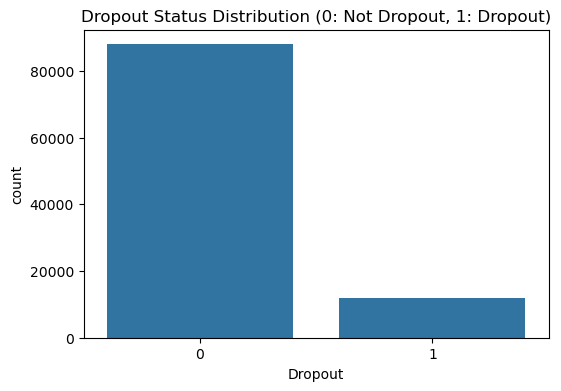

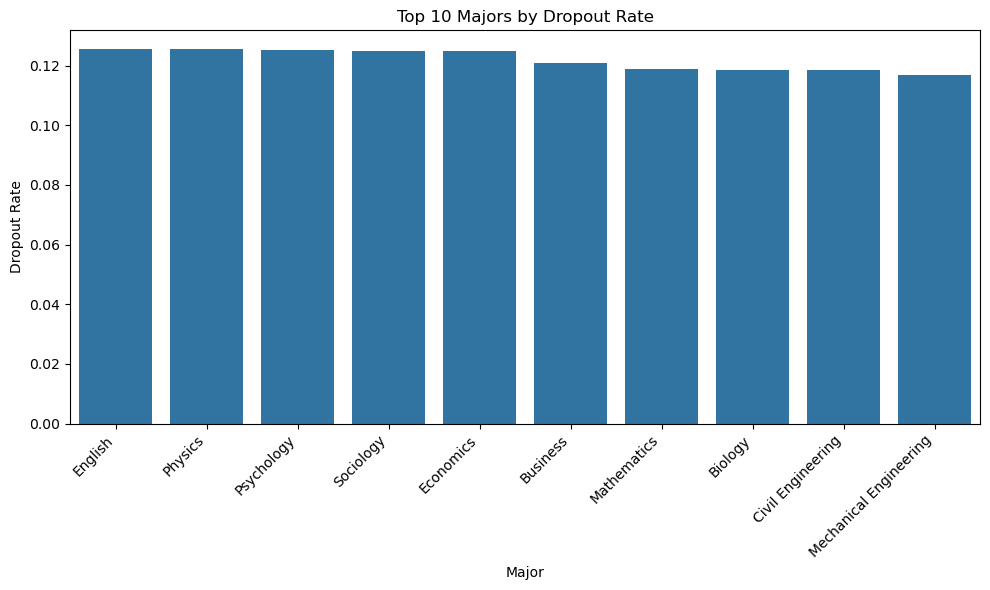

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Dropout', data=df)
plt.title('Dropout Status Distribution (0: Not Dropout, 1: Dropout)')
plt.show()


major_dropout_rate = df.groupby('Major')['Dropout'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=major_dropout_rate.index, y=major_dropout_rate.values)
plt.title('Top 10 Majors by Dropout Rate')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Dropout Rate')
plt.tight_layout()
plt.show()



In [11]:
df.shape

(100000, 17)

In [12]:
df['Major'].value_counts()

Major
Business                  7770
Mechanical Engineering    7760
Physics                   7749
Electrical Engineering    7723
Psychology                7721
Sociology                 7688
Computer Science          7681
English                   7678
Mathematics               7673
Biology                   7656
Economics                 7655
Civil Engineering         7632
Chemistry                 7614
Name: count, dtype: int64

In [13]:
categorical_cols = ['Gender', 'Major', 'Extracurricular', 'ScholarshipType']

In [14]:

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [15]:
df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Major                    0
GPA                      0
AttendanceRate           0
StudyHoursPerWeek        0
Extracurricular          0
ScholarshipType          0
FamilyIncomeK            0
EnrollmentYear           0
Semester                 0
TotalCoursesAttempted    0
PassedCourses            0
FailedCourses            0
DropoutRiskScore         0
Dropout                  0
dtype: int64

In [16]:
features = ['Age', 'Gender', 'Major', 'GPA', 'AttendanceRate', 'StudyHoursPerWeek', 
           'Extracurricular', 'ScholarshipType', 'FamilyIncomeK', 'EnrollmentYear',
           'Semester', 'TotalCoursesAttempted', 'PassedCourses', 'FailedCourses', 'DropoutRiskScore']


In [17]:
X = df[features]
y = df['Dropout']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:

model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [21]:
y_pred = model.predict(X_test_scaled)
#y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [22]:
print("মডেল পারফরম্যান্স:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Repor t:")
print(classification_report(y_test, y_pred))

মডেল পারফরম্যান্স:
Accuracy: 0.99975
Confusion Matrix:
[[17591     1]
 [    4  2404]]
Classification Repor t:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17592
           1       1.00      1.00      1.00      2408

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

